#### Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## DATA collection and Preprocessenig

### About Dataset
Among all industries, insurance domain has the largest use of analytics & data science methods. This data set would provide you enough taste of working on data sets from insurance companies, what challenges are faced, what strategies are used, which variables influence the outcome etc. This is a classification problem. The data has 615 rows and 13 columns.
Problem-----
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.




In [2]:
# Loading data to pandas dataframe
df = pd.read_csv('train_u6lujuX_CVtuZ9i (1).csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#no. of rows and columns
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
#statastical measure
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Insight
From above description of numerical data, means ofApplicantIncome and CoapplicantIncome are not close to each other.
All standard deviations are also varying and not close to each other.
While there is a minimum score 0 for CoapplicantIncome, for ApplicantIncome minimum is much higher = 150

#### Obseravaing unique value of each column

In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
print("Categories in 'gender' variable:   ",end=" ")
print(df['Gender'].unique())

print("Categories in 'Married' variable:   ",end=" ")
print(df['Married'].unique())

print("Categories in 'Dependents' variable:   ",end=" ")
print(df['Dependents'].unique())

print("Categories in 'Education' variable:   ",end=" ")
print(df['Education'].unique())

print("Categories in 'Self_Employed' variable:   ",end=" ")
print(df['Self_Employed'].unique())

print("Categories in 'ApplicantIncome' variable:   ",end=" ")
print(df['ApplicantIncome'].unique())

print("Categories in 'CoapplicantIncome' variable:   ",end=" ")
print(df['CoapplicantIncome'].unique())

print("Categories in 'LoanAmount' variable:   ",end=" ")
print(df['LoanAmount'].unique())

print("Categories in 'Loan_Amount_Term' variable:   ",end=" ")
print(df['Loan_Amount_Term'].unique())

print("Categories in 'Credit_History' variable:   ",end=" ")
print(df['Credit_History'].unique())

print("Categories in 'Property_Area' variable:   ",end=" ")
print(df['Property_Area'].unique())

print("Categories in 'Loan_Status' variable:   ",end=" ")
print(df['Loan_Status'].unique())



Categories in 'gender' variable:    ['Male' 'Female' nan]
Categories in 'Married' variable:    ['No' 'Yes' nan]
Categories in 'Dependents' variable:    ['0' '1' '2' '3+' nan]
Categories in 'Education' variable:    ['Graduate' 'Not Graduate']
Categories in 'Self_Employed' variable:    ['No' 'Yes' nan]
Categories in 'ApplicantIncome' variable:    [ 5849  4583  3000  2583  6000  5417  2333  3036  4006 12841  3200  2500
  3073  1853  1299  4950  3596  3510  4887  2600  7660  5955  3365  3717
  9560  2799  4226  1442  3750  4166  3167  4692  3500 12500  2275  1828
  3667  3748  3600  1800  2400  3941  4695  3410  5649  5821  2645  4000
  1928  3086  4230  4616 11500  2708  2132  3366  8080  3357  3029  2609
  4945  5726 10750  7100  4300  3208  1875  4755  5266  1000  3333  3846
  2395  1378  3988  2366  8566  5695  2958  6250  3273  4133  3620  6782
  2484  1977  4188  1759  4288  4843 13650  4652  3816  3052 11417  7333
  3800  2071  5316  2929  3572  7451  5050 14583  2214  5568 10408  5

In [9]:
# number of missing values in each column
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### Handeling numarical missing data


In [10]:
num_feature = [feature for feature in df.columns if df[feature].dtype != 'O' ]
num_feature

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [11]:
# 'LoanAmount','Loan_Amount_Term','Credit_History' these features are having missing values

In [12]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
imputer.fit(df[['LoanAmount','Loan_Amount_Term','Credit_History']])
df[['LoanAmount','Loan_Amount_Term','Credit_History']] = imputer.transform(df[['LoanAmount','Loan_Amount_Term','Credit_History']])

In [13]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

#### Handeling categorical missing data


In [14]:
cat_feature = [feature for feature in df.columns if df[feature].dtype == 'O' ]
cat_feature

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [15]:
# 'Gender','Self_Employed','Dependents','Married' having missing data

In [16]:
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(df[['Gender','Self_Employed','Dependents','Married']])
df[['Gender','Self_Employed','Dependents','Married']] = imputer.transform(df[['Gender','Self_Employed','Dependents','Married']])

In [17]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [18]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [19]:
# convert categorical columns to numerical values
df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [20]:
# Dependents cloumn
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [21]:
# convert 3+ to 3
df['Dependents'] = df['Dependents'].str.replace('+', '').astype(int)

C:\Users\Shital\AppData\Local\Temp\ipykernel_11212\2150541505.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Dependents'] = df['Dependents'].str.replace('+', '').astype(int)


In [22]:
df['Dependents'].unique()

array([0, 1, 2, 3])

In [23]:
# label encoding
df.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [24]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int32(1), int64(7), object(1)
memory usage: 60.1+ KB


## Exploring Data ( Visualization )

<Axes: xlabel='Self_Employed', ylabel='count'>

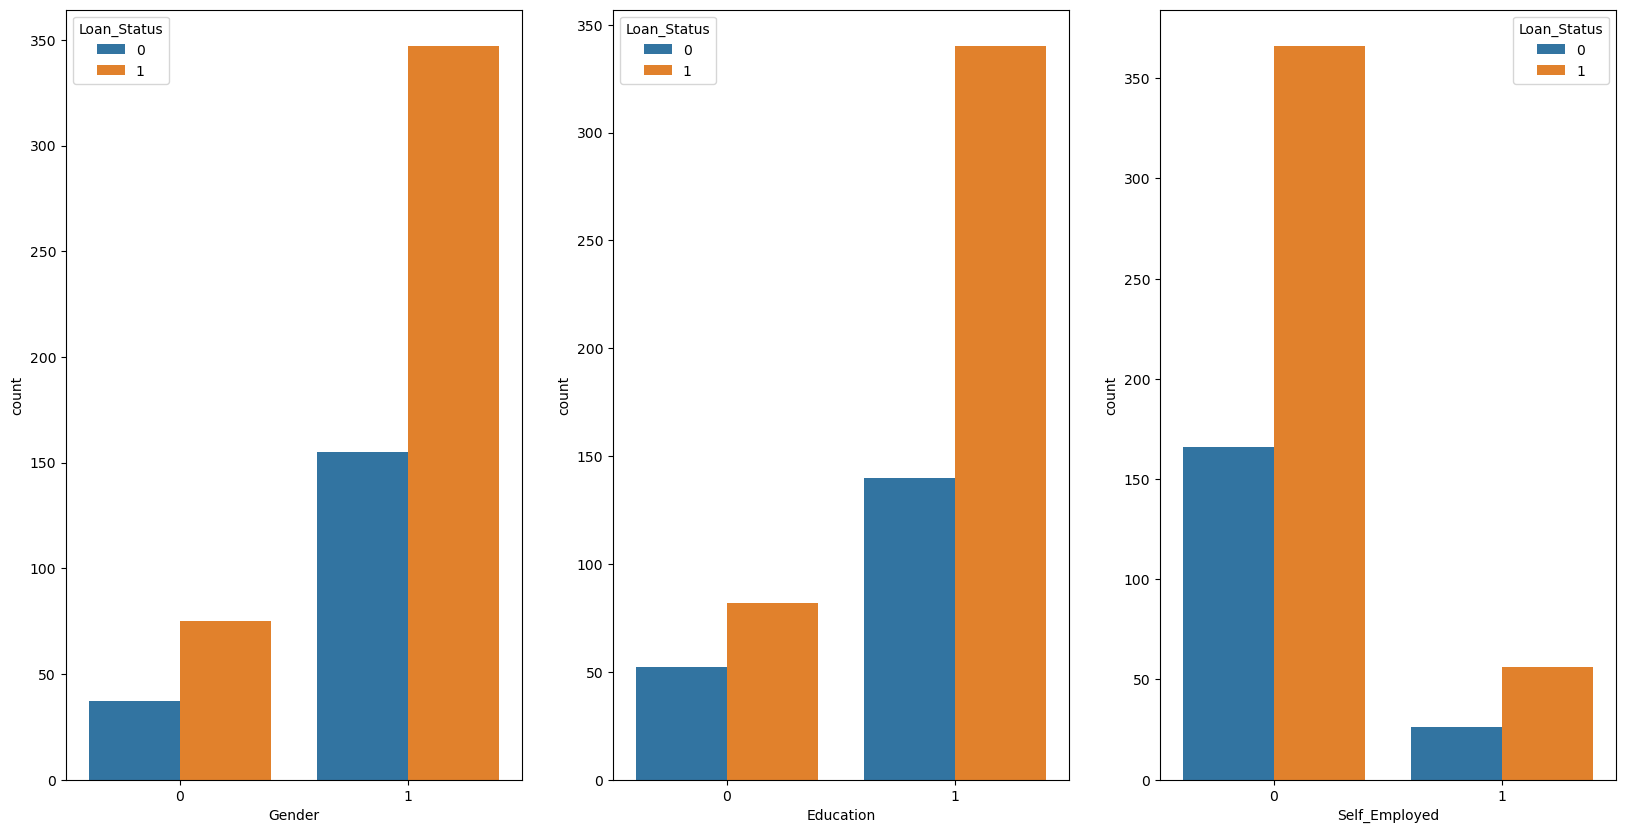

In [36]:
plt.rcParams['figure.figsize'] = (20, 10)

# gender & Loan Status
plt.subplot(1,3,1)
sns.countplot(x='Gender',hue='Loan_Status',data=df)

# Education & Loan Status
plt.subplot(1,3,2)
sns.countplot(x='Education',hue='Loan_Status',data=df)

# Self_Employed & Loan Status
plt.subplot(1,3,3)
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)


#### Insights
1. Based on the available data, it appears that male applicants have a higher chance of getting a loan compared to female applicants.
2.  Based on the available data, it appears that graduate applicants have a higher chance of getting a loan compared to non-graduate applicants. 
3. Based on the available data, it appears that non-self-employed applicants have a higher chance of getting a loan compared to self-employed applicants. 

#### DATA spliting

In [39]:
X = df.drop(['Loan_ID','Loan_Status'],axis = 1)
y = df['Loan_Status']

In [40]:
print(X)
print(y)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0           0          1              0             5849   
1         1        1           1          1              0             4583   
2         1        1           0          1              1             3000   
3         1        1           0          0              0             2583   
4         1        0           0          1              0             6000   
..      ...      ...         ...        ...            ...              ...   
609       0        0           0          1              0             2900   
610       1        1           3          1              0             4106   
611       1        1           1          1              0             8072   
612       1        1           2          1              0             7583   
613       0        0           0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

## Feature Selection- Correlation

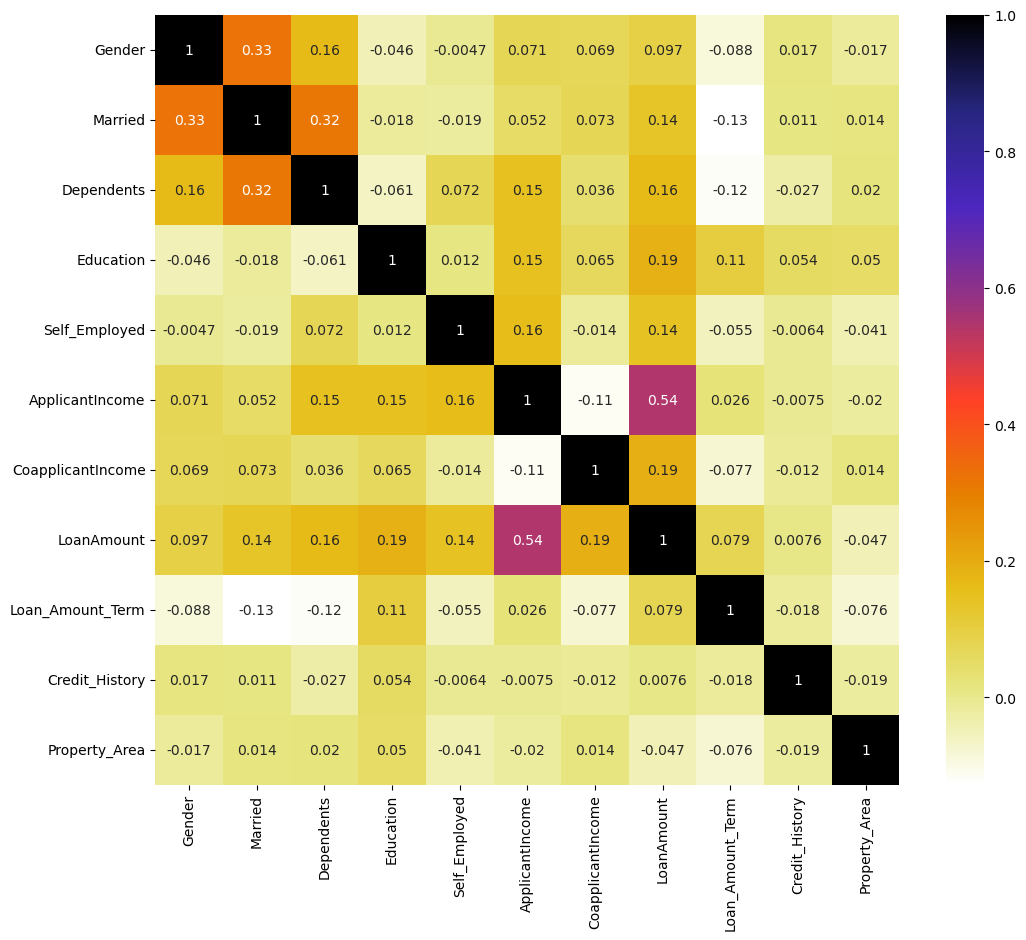

In [44]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [45]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [46]:
corr_features = correlation(X_train, 0.9)
len(set(corr_features))

0

In [41]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training

In [43]:
# Define a list of classifier models
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier()
]

# Train and evaluate each model
for model in models:
    model.fit(X_train, y_train)  # Train the model
    y_pred_train = model.predict(X_train)  # Predict on training data
    y_pred_test = model.predict(X_test)  # Predict on testing data
    
    # Calculate train and test accuracies
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
     # Print the accuracies for each model
    print(f"Model: {model.__class__.__name__}")
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print()


Model: LogisticRegression
Train Accuracy: 0.8167
Test Accuracy: 0.7886

Model: DecisionTreeClassifier
Train Accuracy: 1.0000
Test Accuracy: 0.7073

Model: RandomForestClassifier
Train Accuracy: 1.0000
Test Accuracy: 0.7642

